#**TEAM NIHONGO**

**Members:**
- H071201033 | Muhammad Haerul
- H071201041 | Muhammad Azhar Tawakkal
- H071201045 | Faizah Mappanyompa
- H071201050 | Iman Mustika Ismail


# **Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

# **Read Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv('laptop_price.csv', encoding='cp1252')

In [3]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


# **Data Preparation**

## **Data Formatting**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### **Weight and Ram**

In [6]:
#Replace kg and GB with empty
df["Weight"] = df["Weight"].str.replace("kg", "")
df["Ram"] = df["Ram"].str.replace("GB", "")

#Convert object to numeric
df['Weight'] = pd.to_numeric(df['Weight'])
df['Ram'] = pd.to_numeric(df['Ram'])

### **Memory**

In [7]:
#Replace
df['Memory'] = df["Memory"].str.replace("\.0", "")
df['Memory'] = df["Memory"].str.replace("TB", "000GB")

#Split Memory Information to new Features
conditions_1 = [
    (df["Memory"].str.contains("HDD")),
    (df["Memory"].str.contains("HDD") == False)
]

conditions_2 = [
    (df["Memory"].str.contains("SSD")),
    (df["Memory"].str.contains("SSD") == False)
]

conditions_3 = [
    (df["Memory"].str.contains("Flash Storage")),
    (df["Memory"].str.contains("Flash Storage") == False)
]

conditions_4 = [
    (df["Memory"].str.contains("Hybrid")),
    (df["Memory"].str.contains("Hybrid") == False)
]

conditions_5 = [
    (df["Memory"].str.contains("\+")),
    (df["Memory"].str.contains("\+") == False)
]

values = [1, 0]

df["HDD"] = np.select(conditions_1, values)
df["SSD"] = np.select(conditions_2, values)
df["Flash Storage"] = np.select(conditions_3, values)
df["Hybrid"] = np.select(conditions_4, values)
df["Memory_2"] = np.select(conditions_5, values)

#Replace non-numeric
for i in range (0, len(df)):
  df["Memory"][i] = re.sub('[a-zA-Z]', '', df['Memory'][i])
  df["Memory"][i] = re.sub('\+', '', df['Memory'][i])

#Replace
df["Memory"] = df["Memory"].str.replace("   ", "")

In [8]:
#Split memory based on white space
for i in range(0, len(df)):
  s = df['Memory'][i].split(' ')

#Fill value to memory 1 and 2
for i in range (0, len(df)):
  s = df['Memory'][i].split(' ')
  if len(s) == 2 and s[1] != '':
    df['Memory'][i] = s[0]
    df['Memory_2'][i] = s[1]
  elif len(s) == 3 and s[1] == '' and s[2] == '':
    df['Memory'][i] = s[0]
  elif len(s) == 3 and s[1] != '':
    df['Memory'][i] = s[0]
    df['Memory_2'][i] = s[1]
  elif len(s) == 4 and s[1] == '' and s[2] != '':
    df['Memory'][i] = s[0]
    df['Memory_2'][i] = s[2]


#Convert object to int
df['Memory'] = df['Memory'].astype(np.int64)

### **Screen Resolution**

In [9]:
#Split ScreenResolution Information to new Features

df["Touchscreen"] = df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)
df["IPS"] = df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

#Split ScreenResolution Information to TypeResolution
conditions_6 = [
    (df["ScreenResolution"].str.contains("Full HD")),
    (df["ScreenResolution"].str.contains("Quad HD+")),
    (df["ScreenResolution"].str.contains("4K Ultra HD"))
]

values2 = [1, 2, 3]

df["TypeResolution"] = np.select(conditions_6, values2)

In [10]:
#Remove non-numeric except x
for i in range (0, len(df)):
  df["ScreenResolution"][i] = re.sub('[a-wA-W]', '', df['ScreenResolution'][i])
  df["ScreenResolution"][i] = re.sub('\+', '', df['ScreenResolution'][i])
  df["ScreenResolution"][i] = re.sub('\/', '', df['ScreenResolution'][i])
  df['ScreenResolution'][i] = re.sub('[y-zY-Z]', '', df['ScreenResolution'][i])
  
#Remove ' 4 '
df['ScreenResolution'] = df["ScreenResolution"].str.replace("4 ", "")
df['ScreenResolution'] = df["ScreenResolution"].str.replace(" 4 ", "")

#Remove whitespace
df['ScreenResolution'] = df["ScreenResolution"].str.replace(" ", "")

In [11]:
#Create x_res and y_res features
conditions_7 = [(True)]
values3 = [0]
df["x_res"] = np.select(conditions_7, values3)
df["y_res"] = np.select(conditions_7, values3)


#Fill x_res and y_res from ScreenResolution
for i in range (0, len(df)):
  s = df['ScreenResolution'][i].split('x')
  df['x_res'][i] = s[0]
  df['y_res'][i] = s[1]

In [12]:
df.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,HDD,SSD,Flash Storage,Hybrid,Memory_2,Touchscreen,IPS,TypeResolution,x_res,y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,...,0,1,0,0,0,0,1,0,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,...,0,0,1,0,0,0,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,...,0,1,0,0,0,0,0,1,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,...,0,1,0,0,0,0,1,0,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,...,0,1,0,0,0,0,1,0,2560,1600


### **Price**

In [13]:
for i in range (0, len(df)):
  df['Price_euros'][i] = (df['Price_euros'][i]*17000)

df.rename(columns={'Price_euros': 'Price_IDR'}, inplace=True)

In [14]:
#Save df_clean
df.to_csv('laptop_price_format.csv', index=False)

## **Data Irrelevant**

In [15]:
#Read df after data formatting
df_format = pd.read_csv('/content/laptop_price_format.csv')

In [16]:
#Drop irrelevant feature or feature with same information (redundant)
df_format.drop(['laptop_ID', 'Product', 'ScreenResolution'], inplace=True, axis=1)

In [17]:
df_format.head(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_IDR,HDD,SSD,Flash Storage,Hybrid,Memory_2,Touchscreen,IPS,TypeResolution,x_res,y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,22774730.0,0,1,0,0,0,0,1,0,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,15281980.0,0,0,1,0,0,0,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,9775000.0,0,1,0,0,0,0,0,1,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,43136650.0,0,1,0,0,0,0,1,0,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,30661200.0,0,1,0,0,0,0,1,0,2560,1600


## **Missing Values**

In [18]:
df_format.isnull().sum()

Company           0
TypeName          0
Inches            0
Cpu               0
Ram               0
Memory            0
Gpu               0
OpSys             0
Weight            0
Price_IDR         0
HDD               0
SSD               0
Flash Storage     0
Hybrid            0
Memory_2          0
Touchscreen       0
IPS               0
TypeResolution    0
x_res             0
y_res             0
dtype: int64

## **Data Outliers**

In [19]:
#Create detect_outliers function
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

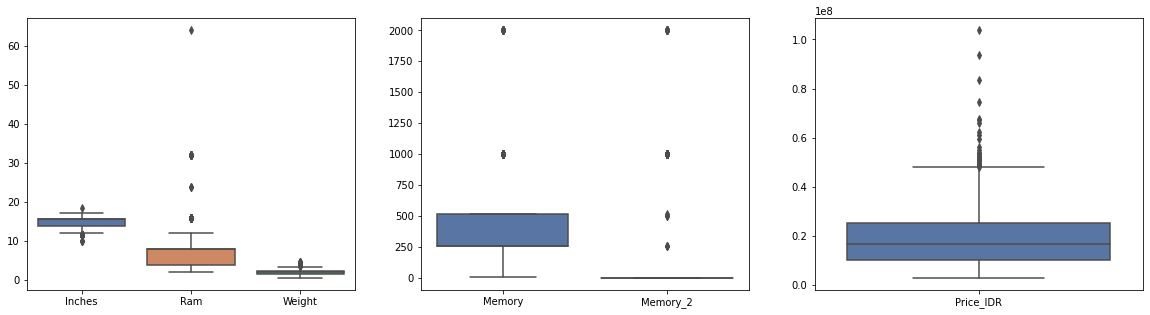

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

#create boxplot in each subplot
sns.set(rc = {'figure.figsize':(20,20)}) 
sns.boxplot(data=df_format[['Inches','Ram','Weight']], ax=axes[0])
sns.boxplot(data=df_format[['Memory','Memory_2']], ax=axes[1])
sns.boxplot(data=df_format[['Price_IDR']], ax=axes[2])


# **Data Visualization**

In [21]:
df_format.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1303 non-null   object 
 1   TypeName        1303 non-null   object 
 2   Inches          1303 non-null   float64
 3   Cpu             1303 non-null   object 
 4   Ram             1303 non-null   int64  
 5   Memory          1303 non-null   int64  
 6   Gpu             1303 non-null   object 
 7   OpSys           1303 non-null   object 
 8   Weight          1303 non-null   float64
 9   Price_IDR       1303 non-null   float64
 10  HDD             1303 non-null   int64  
 11  SSD             1303 non-null   int64  
 12  Flash Storage   1303 non-null   int64  
 13  Hybrid          1303 non-null   int64  
 14  Memory_2        1303 non-null   int64  
 15  Touchscreen     1303 non-null   int64  
 16  IPS             1303 non-null   int64  
 17  TypeResolution  1303 non-null   i

In [23]:
df_format.describe()

,Inches,Ram,Memory,Weight,Price_IDR,HDD,SSD,Flash Storage,Hybrid,Memory_2,Touchscreen,IPS,TypeResolution,x_res,y_res
count,1303.000000,1303.000000,1303.000000,1303.000000,1.303000e+03,1303.000000,1303.000000,1303.000000,1303.00000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,442.615503,2.038734,1.910268e+07,0.442057,0.646969,0.057559,0.00921,168.288565,0.147352,0.280123,0.792018,1894.784344,1070.830391
std,1.426304,5.084665,356.225802,0.665475,1.188315e+07,0.496822,0.478096,0.232998,0.09556,402.618575,0.354593,0.449231,0.639603,494.641028,284.519410
min,10.100000,2.000000,8.000000,0.690000,2.958000e+06,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1366.000000,768.000000
25%,14.000000,4.000000,256.000000,1.500000,1.018300e+07,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1600.000000,900.000000
50%,15.600000,8.000000,256.000000,2.040000,1.660900e+07,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1920.000000,1080.000000
75%,15.600000,8.000000,512.000000,2.300000,2.529396e+07,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1920.000000,1080.000000
max,18.400000,64.000000,2000.000000,4.700000,1.036830e+08,1.000000,1.000000,1.000000,1.00000,2000.000000,1.000000,1.000000,3.000000,3840.000000,2160.000000


## **Data Numeric**

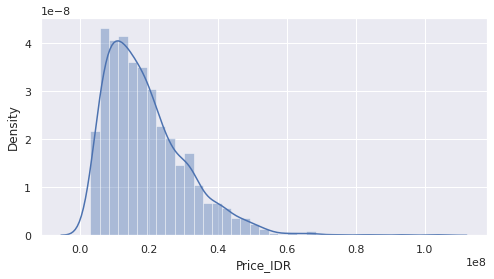

In [24]:
#Distribution of Price_IDR (label)
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(df_format['Price_IDR'])

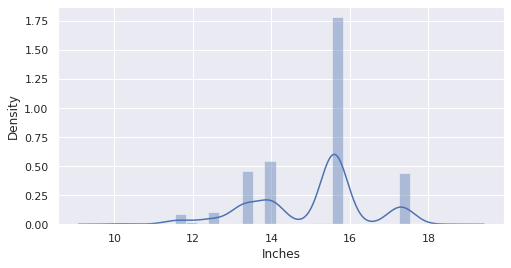

In [25]:
#Disrtibution of Inches
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(df_format['Inches'])

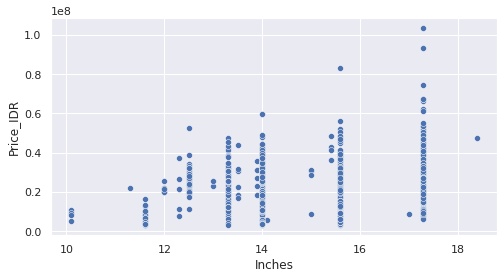

In [26]:
#Inches with Price
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(x=df_format['Inches'],y=df_format['Price_IDR'])

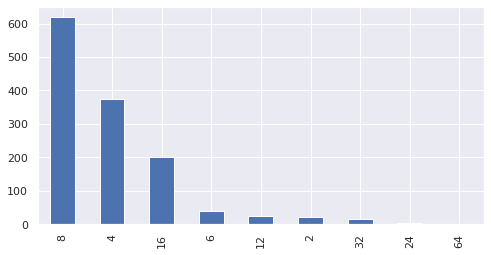

In [27]:
#Distribution of RAM
fig, ax = plt.subplots(figsize=(8,4))
plt.xticks(rotation='horizontal')
df_format['Ram'].value_counts().plot(kind='bar')

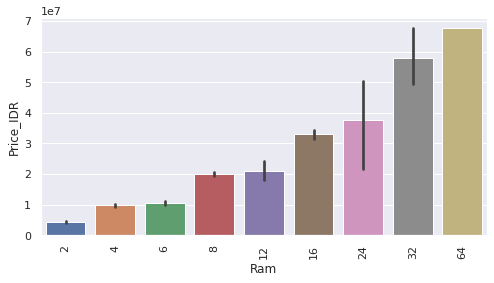

In [ ]:
#RAM with Price
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df_format['Ram'],y=df_format['Price_IDR'])
plt.xticks(rotation='vertical')
plt.show()

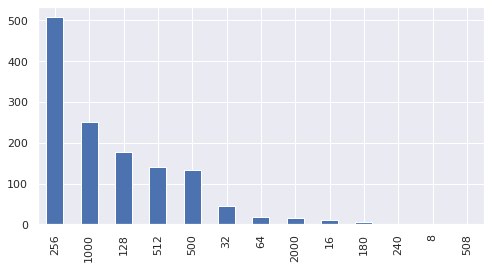

In [28]:
#Distribution of Memory 
fig, ax = plt.subplots(figsize=(8,4))
df_format['Memory'].value_counts().plot(kind='bar')

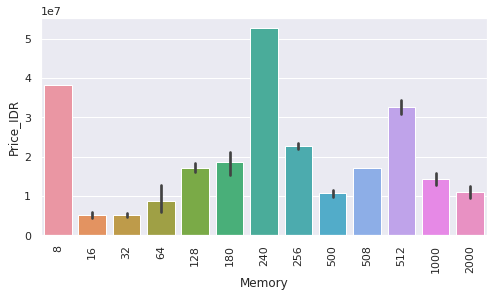

In [29]:
#Memory with Price_IDR
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df_format['Memory'],y=df_format['Price_IDR'])
plt.xticks(rotation='vertical')
plt.show()

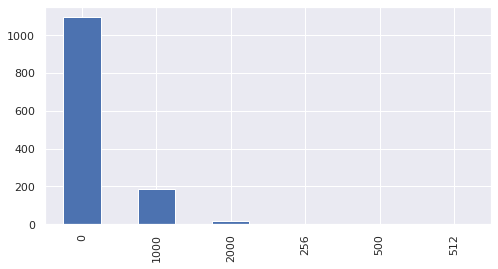

In [32]:
#Distribution of Memory_2 
fig, ax = plt.subplots(figsize=(8,4))
df_format['Memory_2'].value_counts().plot(kind='bar')

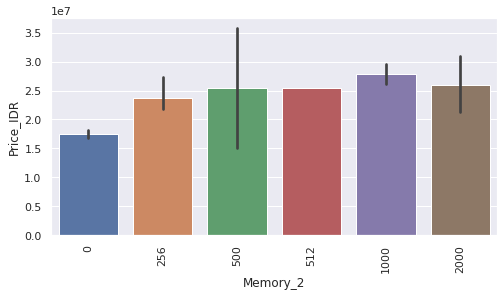

In [33]:
#Memory_2 with Price_IDR
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df_format['Memory_2'],y=df_format['Price_IDR'])
plt.xticks(rotation='vertical')
plt.show()

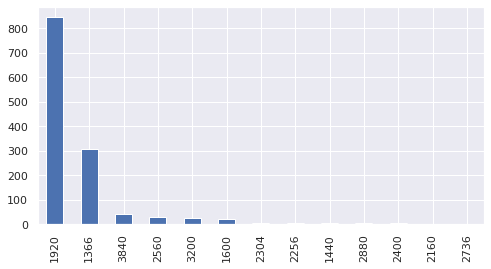

In [38]:
fig, ax = plt.subplots(figsize=(8,4))
df_format['x_res'].value_counts().plot(kind='bar')

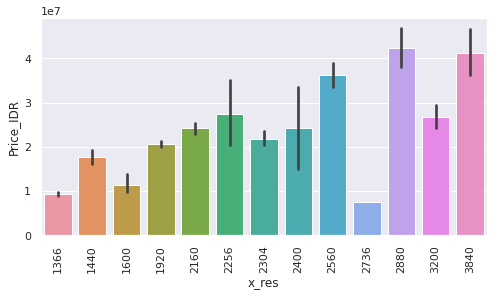

In [39]:
#x_res with Price_IDR
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df_format['x_res'],y=df_format['Price_IDR'])
plt.xticks(rotation='vertical')
plt.show()

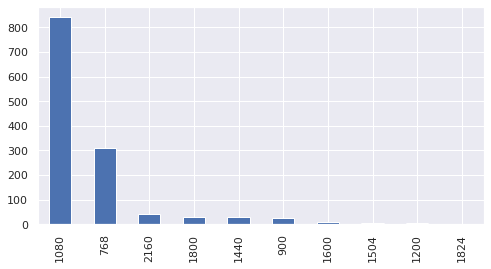

In [41]:
#Distribution of y_res
fig, ax = plt.subplots(figsize=(8,4))
df_format['y_res'].value_counts().plot(kind='bar')

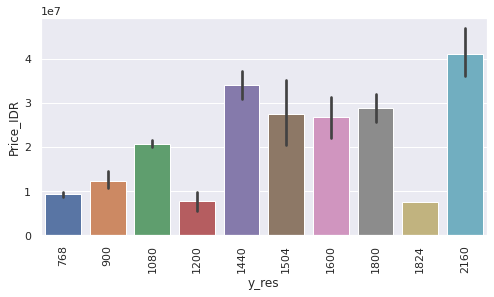

In [42]:
#y_res with Price_IDR
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df_format['y_res'],y=df_format['Price_IDR'])
plt.xticks(rotation='vertical')
plt.show()

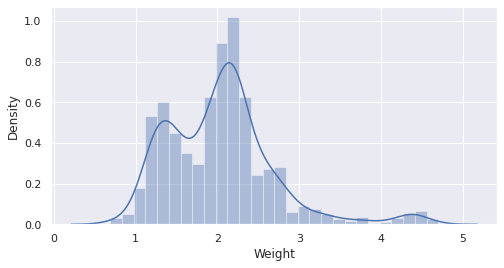

In [43]:
#Distribution of Weight
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(df_format['Weight'])

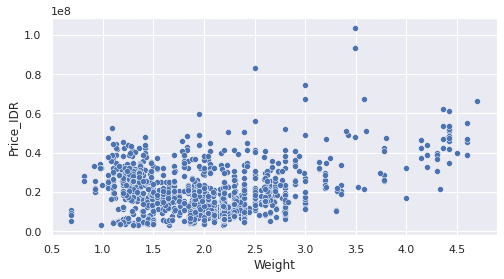

In [44]:
#Weight with Price_IDR
fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(x=df_format['Weight'],y=df_format['Price_IDR'])

## **Data Categoric**

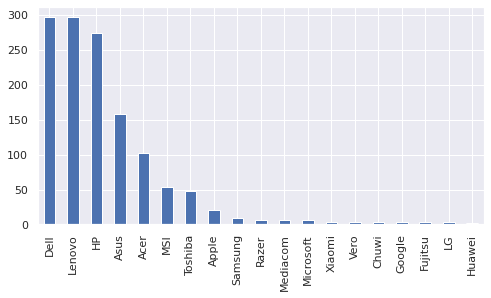

In [ ]:
#Distrubution of Company
fig, ax = plt.subplots(figsize=(8,4))
df['Company'].value_counts().plot(kind='bar')

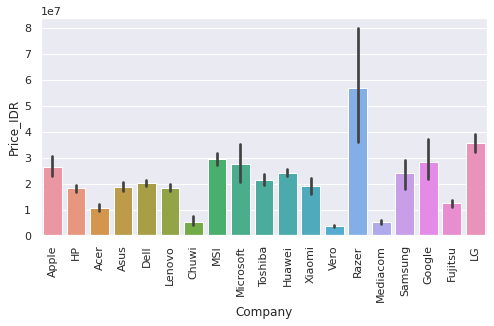

In [ ]:
#Company with Price
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df['Company'],y=df['Price_IDR'])
plt.xticks(rotation='vertical')
plt.show()

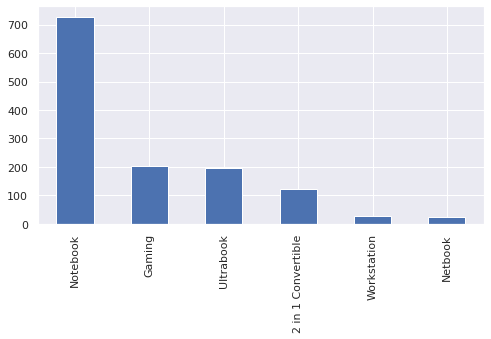

In [ ]:
#Disrtibution of TypeName
fig, ax = plt.subplots(figsize=(8,4))
df['TypeName'].value_counts().plot(kind='bar')

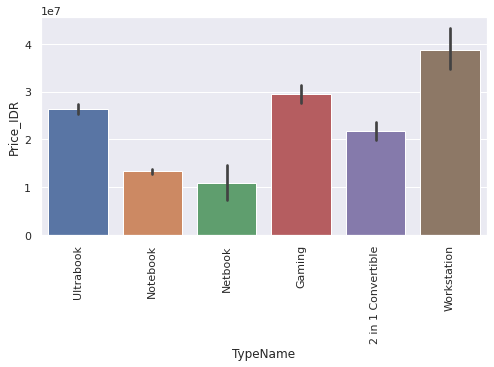

In [ ]:
#TypeName with Price
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df['TypeName'],y=df['Price_IDR'])
plt.xticks(rotation='vertical')
plt.show()

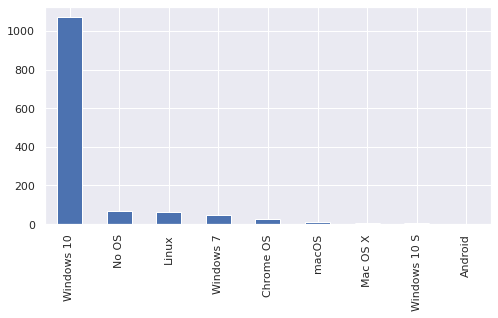

In [50]:
#Disrtibution of OpSys
fig, ax = plt.subplots(figsize=(8,4))
df['OpSys'].value_counts().plot(kind='bar')

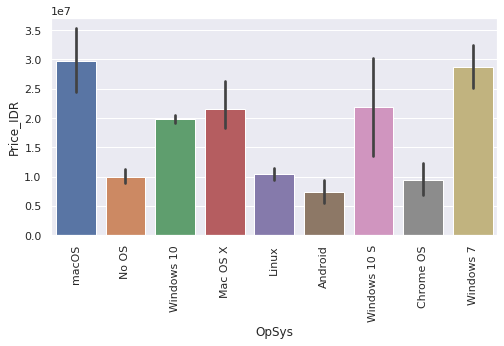

In [51]:
#OpSys with Price
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df['OpSys'],y=df['Price_IDR'])
plt.xticks(rotation='vertical')
plt.show()

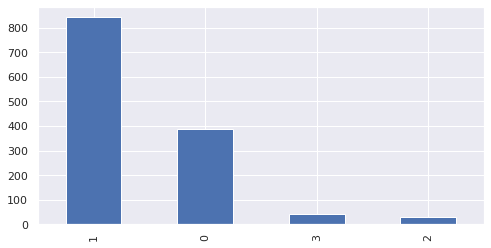

In [52]:
#Disrtibution of TypeResolution
fig, ax = plt.subplots(figsize=(8,4))
df['TypeResolution'].value_counts().plot(kind='bar')

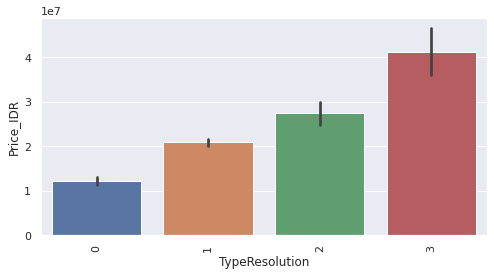

In [53]:
#TypeResolution with Price
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df['TypeResolution'],y=df['Price_IDR'])
plt.xticks(rotation='vertical')
plt.show()

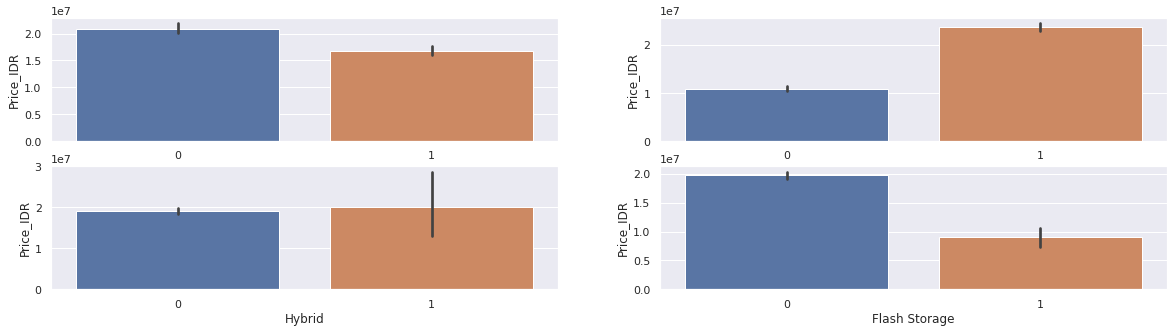

In [94]:
#HDD, SSD, Hybrid and FlashStorage with Price
fig, axes = plt.subplots(2, 2, figsize=(20, 5))

sns.set(rc = {'figure.figsize':(20,20)}) 
sns.barplot(x=df['HDD'],y=df['Price_IDR'], ax=axes[0][0])
sns.barplot(x=df['SSD'],y=df['Price_IDR'], ax=axes[0][1])
sns.barplot(x=df['Hybrid'],y=df['Price_IDR'], ax=axes[1][0])
sns.barplot(x=df['Flash Storage'],y=df['Price_IDR'], ax=axes[1][1])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

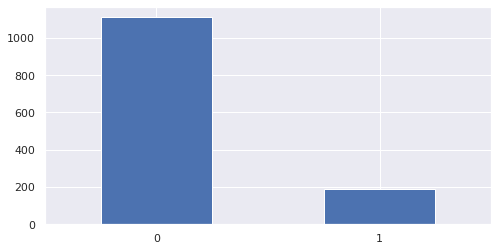

In [68]:
#Distribution of Touchscreen
fig, ax = plt.subplots(figsize=(8,4))
df['Touchscreen'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')

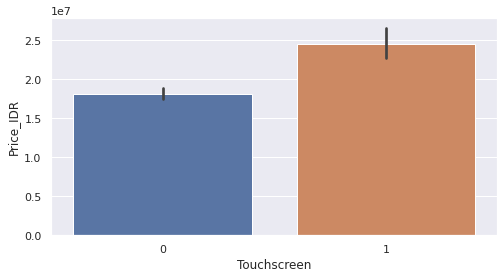

In [69]:
#Touchscreen with Price
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df['Touchscreen'],y=df['Price_IDR'])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

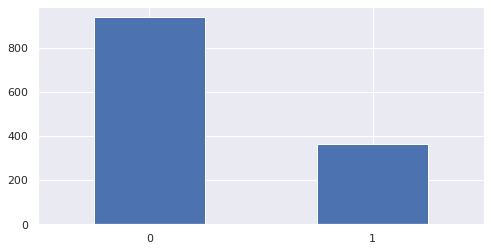

In [70]:
#Distribution of IPS
fig, ax = plt.subplots(figsize=(8,4))
df['IPS'].value_counts().plot(kind='bar')
plt.xticks(rotation='horizontal')

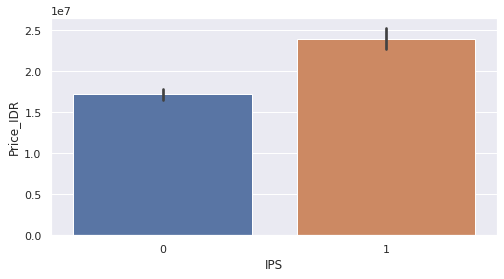

In [71]:
#IPS with Price
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df['IPS'],y=df['Price_IDR'])

# **Data Encoding**

In [72]:
df_encoding = df_format

In [73]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1303 non-null   object 
 1   TypeName        1303 non-null   object 
 2   Inches          1303 non-null   float64
 3   Cpu             1303 non-null   object 
 4   Ram             1303 non-null   int64  
 5   Memory          1303 non-null   int64  
 6   Gpu             1303 non-null   object 
 7   OpSys           1303 non-null   object 
 8   Weight          1303 non-null   float64
 9   Price_IDR       1303 non-null   float64
 10  HDD             1303 non-null   int64  
 11  SSD             1303 non-null   int64  
 12  Flash Storage   1303 non-null   int64  
 13  Hybrid          1303 non-null   int64  
 14  Memory_2        1303 non-null   int64  
 15  Touchscreen     1303 non-null   int64  
 16  IPS             1303 non-null   int64  
 17  TypeResolution  1303 non-null   i

In [74]:
#Label Encoder for many unique value
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoding['Company'] = le.fit_transform(df_encoding['Company'])

df_encoding['TypeName'] = le.fit_transform(df_encoding['TypeName'])
df_encoding['Cpu'] = le.fit_transform(df_encoding['Cpu'])
df_encoding['Gpu'] = le.fit_transform(df_encoding['Gpu'])
df_encoding['OpSys'] = le.fit_transform(df_encoding['OpSys'])

# **Feature Engineering**

In [75]:
df_encoding.to_csv('laptop_price_encoding.csv', index=False)

In [76]:
X = df_encoding[['Company','TypeName','Inches','Cpu','Ram','Memory','Gpu','OpSys','HDD','SSD', 'Flash Storage', 'Hybrid', 
      'Memory_2','Touchscreen','IPS','TypeResolution', 'x_res', 'y_res']]
y = df_encoding['Price_IDR']

## **Feature Selection**

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Apply SelectKBest for data extraction
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Joining two dataframes
featureScores = pd.concat([dfcolumns, dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

             Specs          Score
12        Memory_2  807199.747299
5           Memory  238894.351076
16           x_res  119241.501743
17           y_res   69727.380804
3              Cpu    8042.489816
6              Gpu    7862.597563
4              Ram    3517.263860
0          Company    2226.713377
11          Hybrid     942.158415
10   Flash Storage     891.205524
13     Touchscreen     649.361699
14             IPS     603.935258
15  TypeResolution     494.246626
1         TypeName     490.490487
8              HDD     465.556426
9              SSD     348.696521
7            OpSys     209.655651
2           Inches     115.578256


## **Feature Importance**

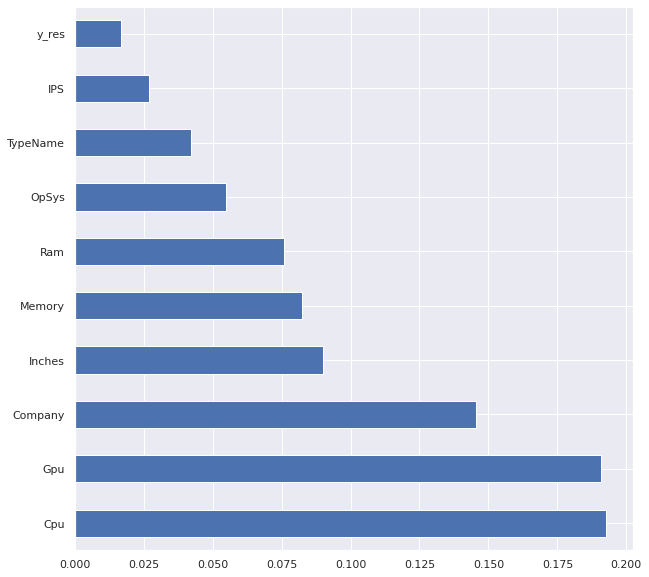

In [78]:
# ExtraTreesClassifier for fitur extraction 
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

# plot from feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.show()

## **Feature Correlation**

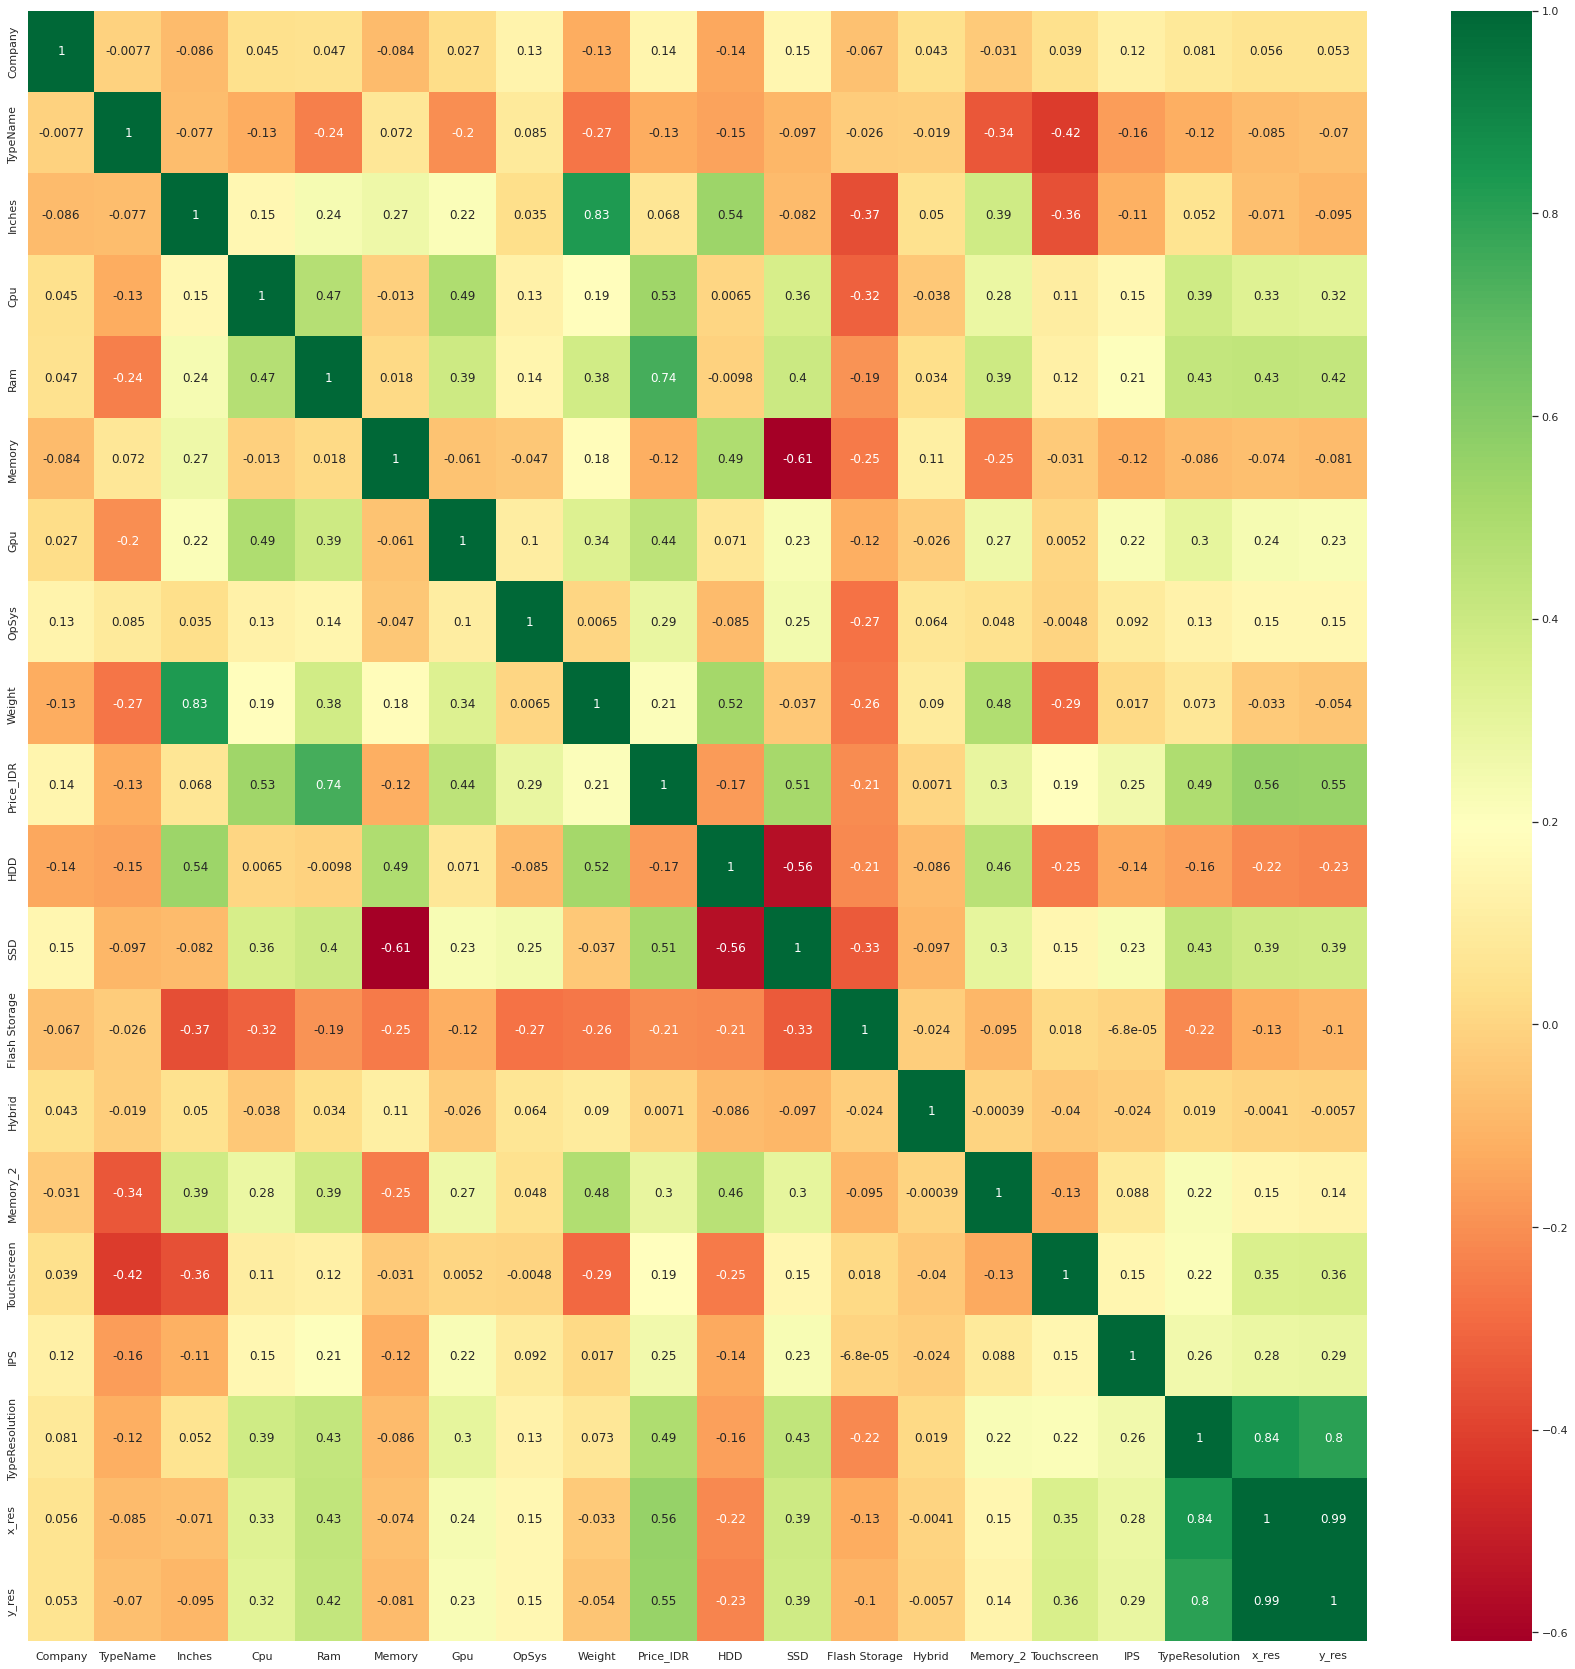

In [79]:
plt.figure(figsize=(30,30))
g=sns.heatmap(df_encoding.corr(), annot=True, cmap="RdYlGn")

# **Data Visualization II**

In [80]:
df_encoding = pd.read_csv('laptop_price_encoding.csv')

In [81]:
df_visualization = df_encoding

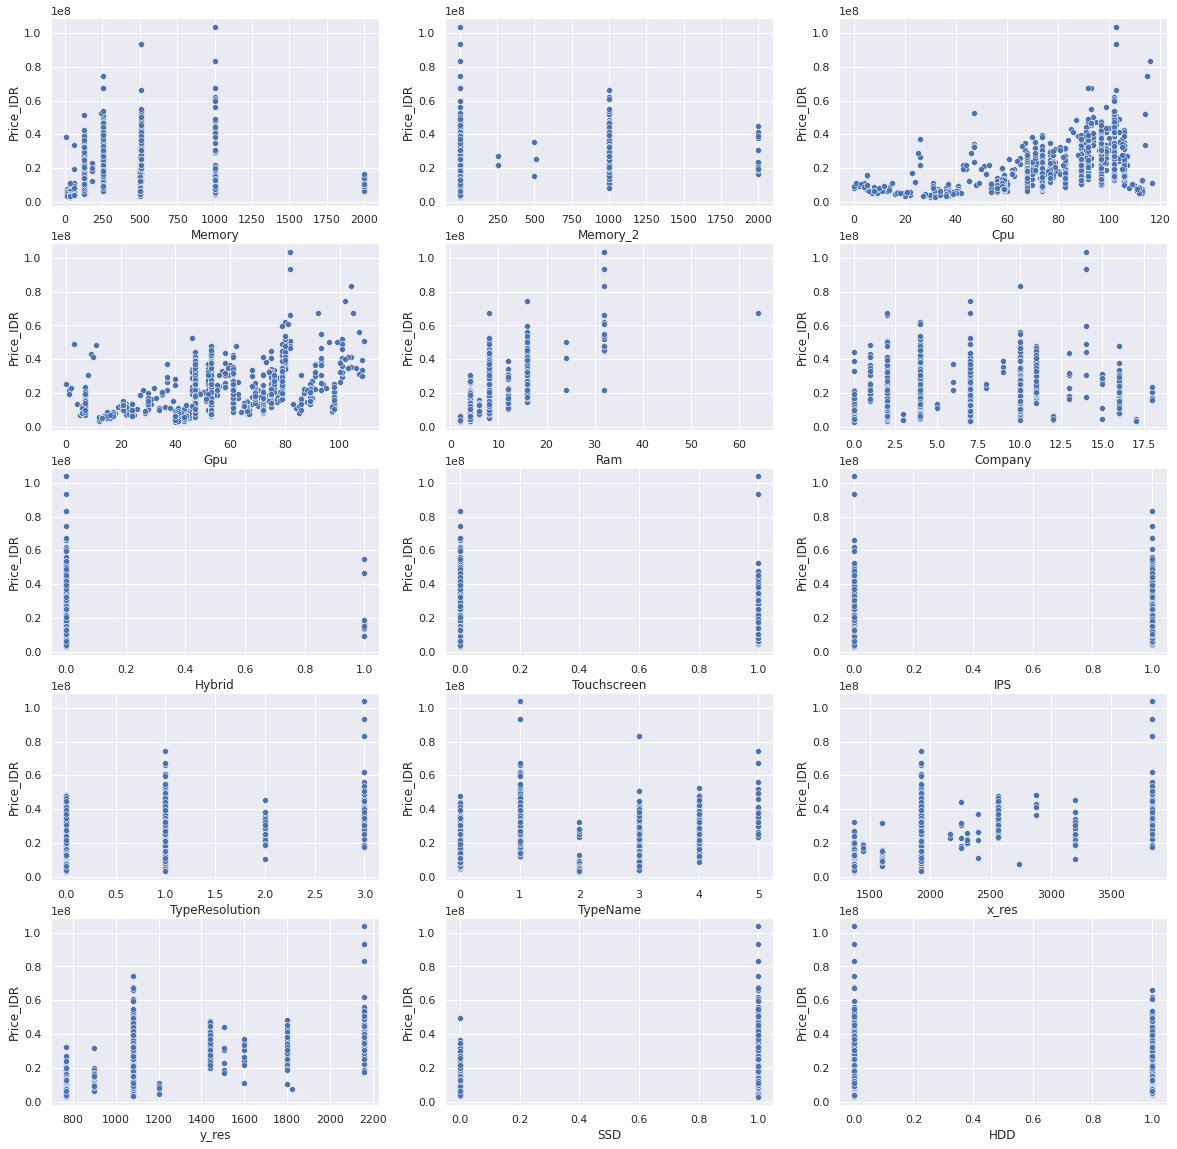

In [82]:
# scatterplot

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (5 rows, 3 columns)
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

#create boxplot in each subplot
sns.scatterplot(data=df_visualization, y='Price_IDR', x='Memory', ax=axes[0,0])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='Memory_2', ax=axes[0,1])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='Cpu', ax=axes[0,2])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='Gpu', ax=axes[1,0])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='Ram', ax=axes[1,1])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='Company', ax=axes[1,2])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='Hybrid', ax=axes[2,0])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='Touchscreen', ax=axes[2,1])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='IPS', ax=axes[2,2])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='TypeResolution', ax=axes[3,0])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='TypeName', ax=axes[3,1])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='x_res', ax=axes[3,2])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='y_res', ax=axes[4,0])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='SSD', ax=axes[4,1])
sns.scatterplot(data=df_visualization, y='Price_IDR', x='HDD', ax=axes[4,2])


# **Model Building and Model Evaluation**

In [83]:
df_model = pd.read_csv('laptop_price_encoding.csv')

In [84]:
X = df_model[['Memory', 'Memory_2', 'x_res', 'y_res', 'Cpu','Gpu', 'Ram', 'Company', 'Hybrid', 'Touchscreen', 'IPS', 
              'TypeResolution', 'TypeName', 'HDD', 'SSD']]
y = df_model['Price_IDR']

In [85]:
#Split data --> train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
#Build Model using LM
from sklearn import linear_model
 
l_model = linear_model.RidgeCV() 
l_model = l_model.fit(X_train, y_train)

#Predict x_test
from sklearn.metrics import accuracy_score
y_pred = l_model.predict(X_test)

#R2, MAE, MSE 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Model Performance using Linear Model:')
print('R2 :', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))

Model Performance using Linear Model:
R2 : 0.671
MAE: 5278972.804
MSE: 55958836015530.45


In [87]:
#Build Model using DT
from sklearn.tree import DecisionTreeClassifier
 
tree_model = DecisionTreeClassifier(random_state=0) 
tree_model = tree_model.fit(X_train, y_train)

#Predict x_test
from sklearn.metrics import accuracy_score
y_pred = tree_model.predict(X_test)

#R2, MAE, MSE
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Model Performance using Decision Tree:')
print('R2 :', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))

Model Performance using Decision Tree:
R2 : 0.728
MAE: 4501622.146
MSE: 46230803044486.59


In [88]:
#Build Model using RF
from sklearn.ensemble import RandomForestClassifier
 
rf_model = RandomForestClassifier(random_state=0) 
rf_model = rf_model.fit(X_train, y_train)

#Predict x_test
from sklearn.metrics import accuracy_score
y_pred = rf_model.predict(X_test)

#R2, MAE, MSE
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Model Performance using Random Forest:')
print('R2 :', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))

Model Performance using Random Forest:
R2 : 0.718
MAE: 4340083.716
MSE: 47893879374996.555


In [89]:
#Build Model using XGBoost
import xgboost as xgb
 
xgb_model = xgb.XGBRegressor() 
xgb_model = xgb_model.fit(X_train, y_train)

#Predict x_test
from sklearn.metrics import accuracy_score
y_pred = xgb_model.predict(X_test)

#R2, MAE, MSE 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Model Performance using XGBoost:')
print('R2 :', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))

[00:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Performance using XGBoost:
R2 : 0.803
MAE: 3883918.446
MSE: 33530611510801.38


In [90]:
#Build Model using SVM
from sklearn import svm
 
svm_model = svm.SVR() 
svm_model = svm_model.fit(X_train, y_train)

#Predict x_test
from sklearn.metrics import accuracy_score
y_pred = svm_model.predict(X_test)

#R2, MAE, MSE
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Model Performance using SVM:')
print('R2 :', round(r2, 3))
print('MAE:', round(mae, 3))
print('MSE:', round(mse, 3))

Model Performance using SVM:
R2 : -0.138
MAE: 9830246.423
MSE: 193561961487268.9


In [91]:
# Prediction Test
test = {'Memory': [1000],
      'Memory_2': [512],
      'x_res': [1980],
      'y_res': [1080],
      'Cpu': ['Intel Core i7 4.9GHz'],
      'Gpu': ['NVidia GeForce RTX 3050'],
      'Ram': [16],
      'Company': ['Asus'],
      'Hybrid': [1],
      'Touchscreen': [0],
      'IPS': [1],
      'TypeResolution': [2],
      'TypeName': ['Gaming'],
      'HDD': [1],
      'SSD': [1]
      }

test = pd.DataFrame(test)

test['TypeName'] = le.fit_transform(test['TypeName'])
test['Cpu'] = le.fit_transform(test['Cpu'])
test['Gpu'] = le.fit_transform(test['Gpu'])
test['Company'] = le.fit_transform(test['Company'])

test_pred = xgb_model.predict(test)
print(test_pred)

[35924404.]
